# Slice grid sampling (SGS) test

In [1]:
import numpy as np
import proplot as pplt
import psdist.visualization as psv
import torch

import mentflow as mf
from mentflow.utils import grab

In [2]:
pplt.rc["cmap.discrete"] = False
pplt.rc["cmap.sequential"] = "viridis"
pplt.rc["figure.facecolor"] = "white"
pplt.rc["grid"] = False

In [3]:
d = 6
d_proj = 2
grid_res = 33
grid_xmax = 4.5
int_res = 5
int_size = int_res ** d
noise = 0.0
seed = 21

grid_shape = tuple(d * [grid_res])
grid_limits = d * [(-grid_xmax, grid_xmax)]

sampler = mf.sample.SliceGridSampler(
    grid_limits=grid_limits,
    grid_shape=grid_shape,
    proj_dim=d_proj,
    noise=noise,
    int_size=int_size,
    int_method="grid",
    int_batches=1,
    verbose=True,
)

dist = mf.dist.dist_nd.GaussianMixture(d=d, modes=4, seed=seed, xmax=2.0, scale=0.50, shiftscale=False)

Test projection

In [4]:
# rho = sampler.project(lambda x: torch.exp(dist.log_prob(x)))
# y = mf.sample.sample_hist(rho, sampler.proj_grid_edges, 100000)
# y = grab(y)

# axis = tuple(range(d_proj))
# x = dist.sample(y.shape[0])
# x = grab(x)

# bin_edges = [grab(e) for e in sampler.proj_grid_edges]

# grid = psv.CornerGrid(d_proj)
# grid.plot_points(x, bins=bin_edges, cmap="mono")
# grid.plot_points(y[:1000], kind="scatter", color="red", diag_kws=dict(color="red"))

Test sampling

In [5]:
n_samples = int(1.00e+06)

sampler.noise = 1.0
x_samp = sampler(
    log_prob_func=dist.log_prob,
    n=n_samples,
)
x_samp = grab(x_samp)

Projecting


100%|████████████████████████████████████████████████████████████████████████████████| 1089/1089 [00:01<00:00, 548.71it/s]


Sampling


1089it [00:55, 19.53it/s]


In [6]:
x_true = dist.sample(n_samples)
x_true = grab(x_true)

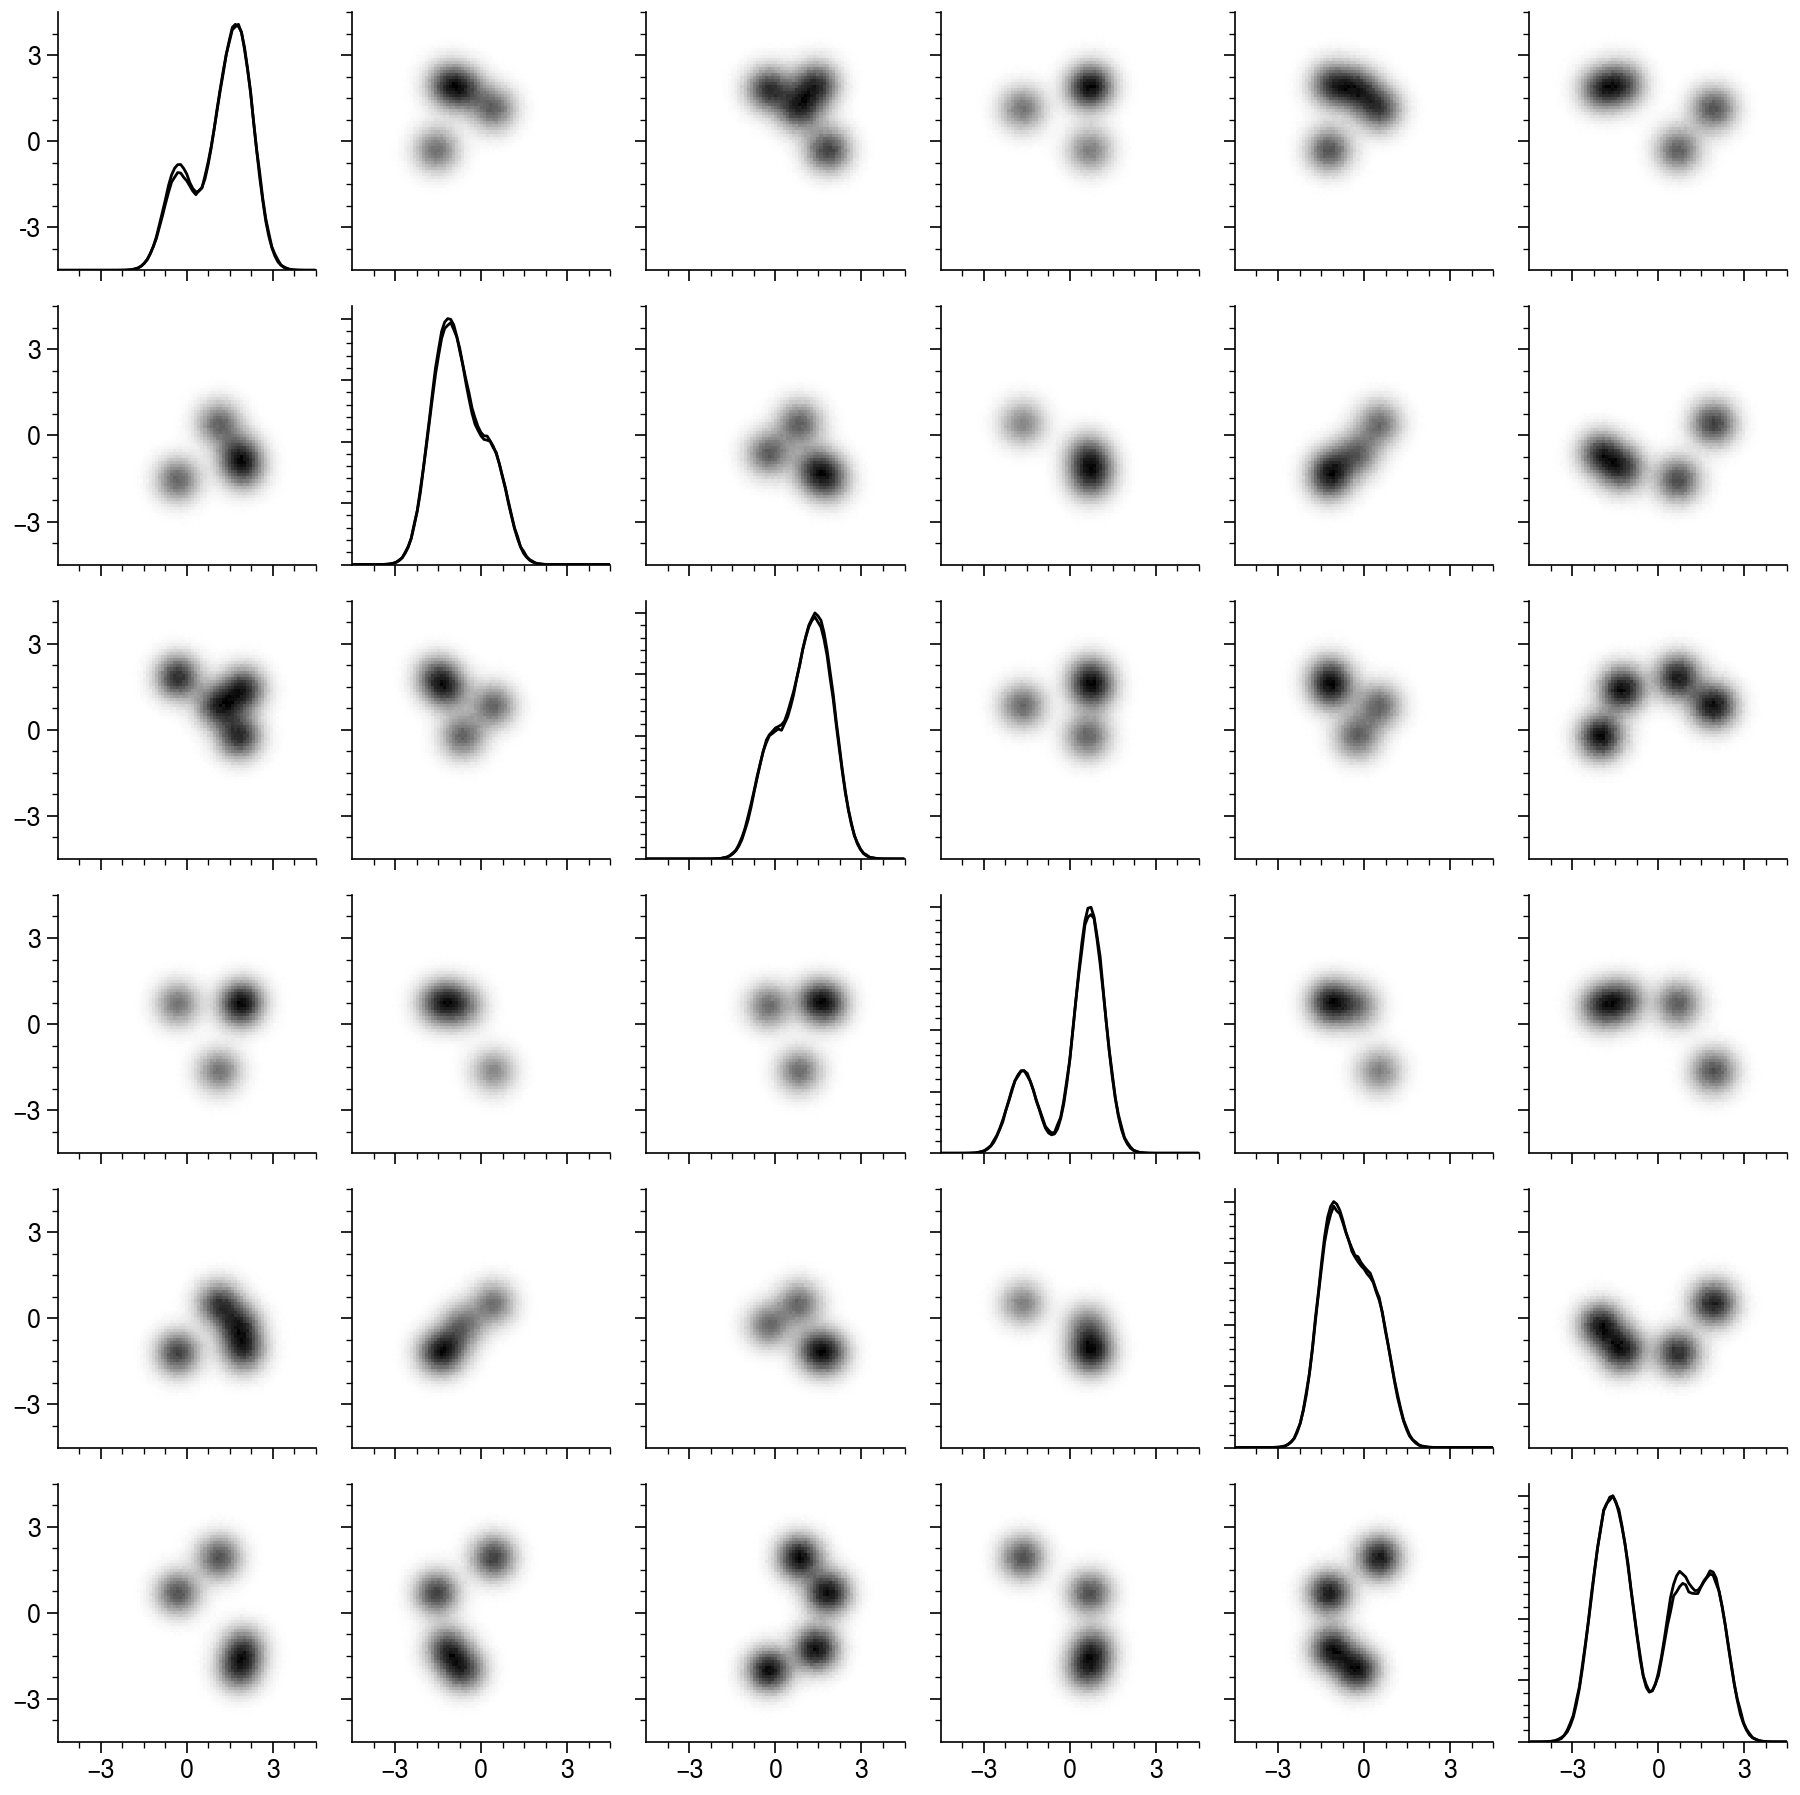

In [7]:
grid = psv.CornerGrid(d, corner=False)
grid.plot_points(x_true, bins=85, limits=grid_limits, upper=False, lower=True, cmap="mono", diag_kws=dict(kind="line"))
grid.plot_points(x_samp, bins=85, limits=grid_limits, lower=False, upper=True, cmap="mono", diag_kws=dict(kind="line"))
pplt.show()

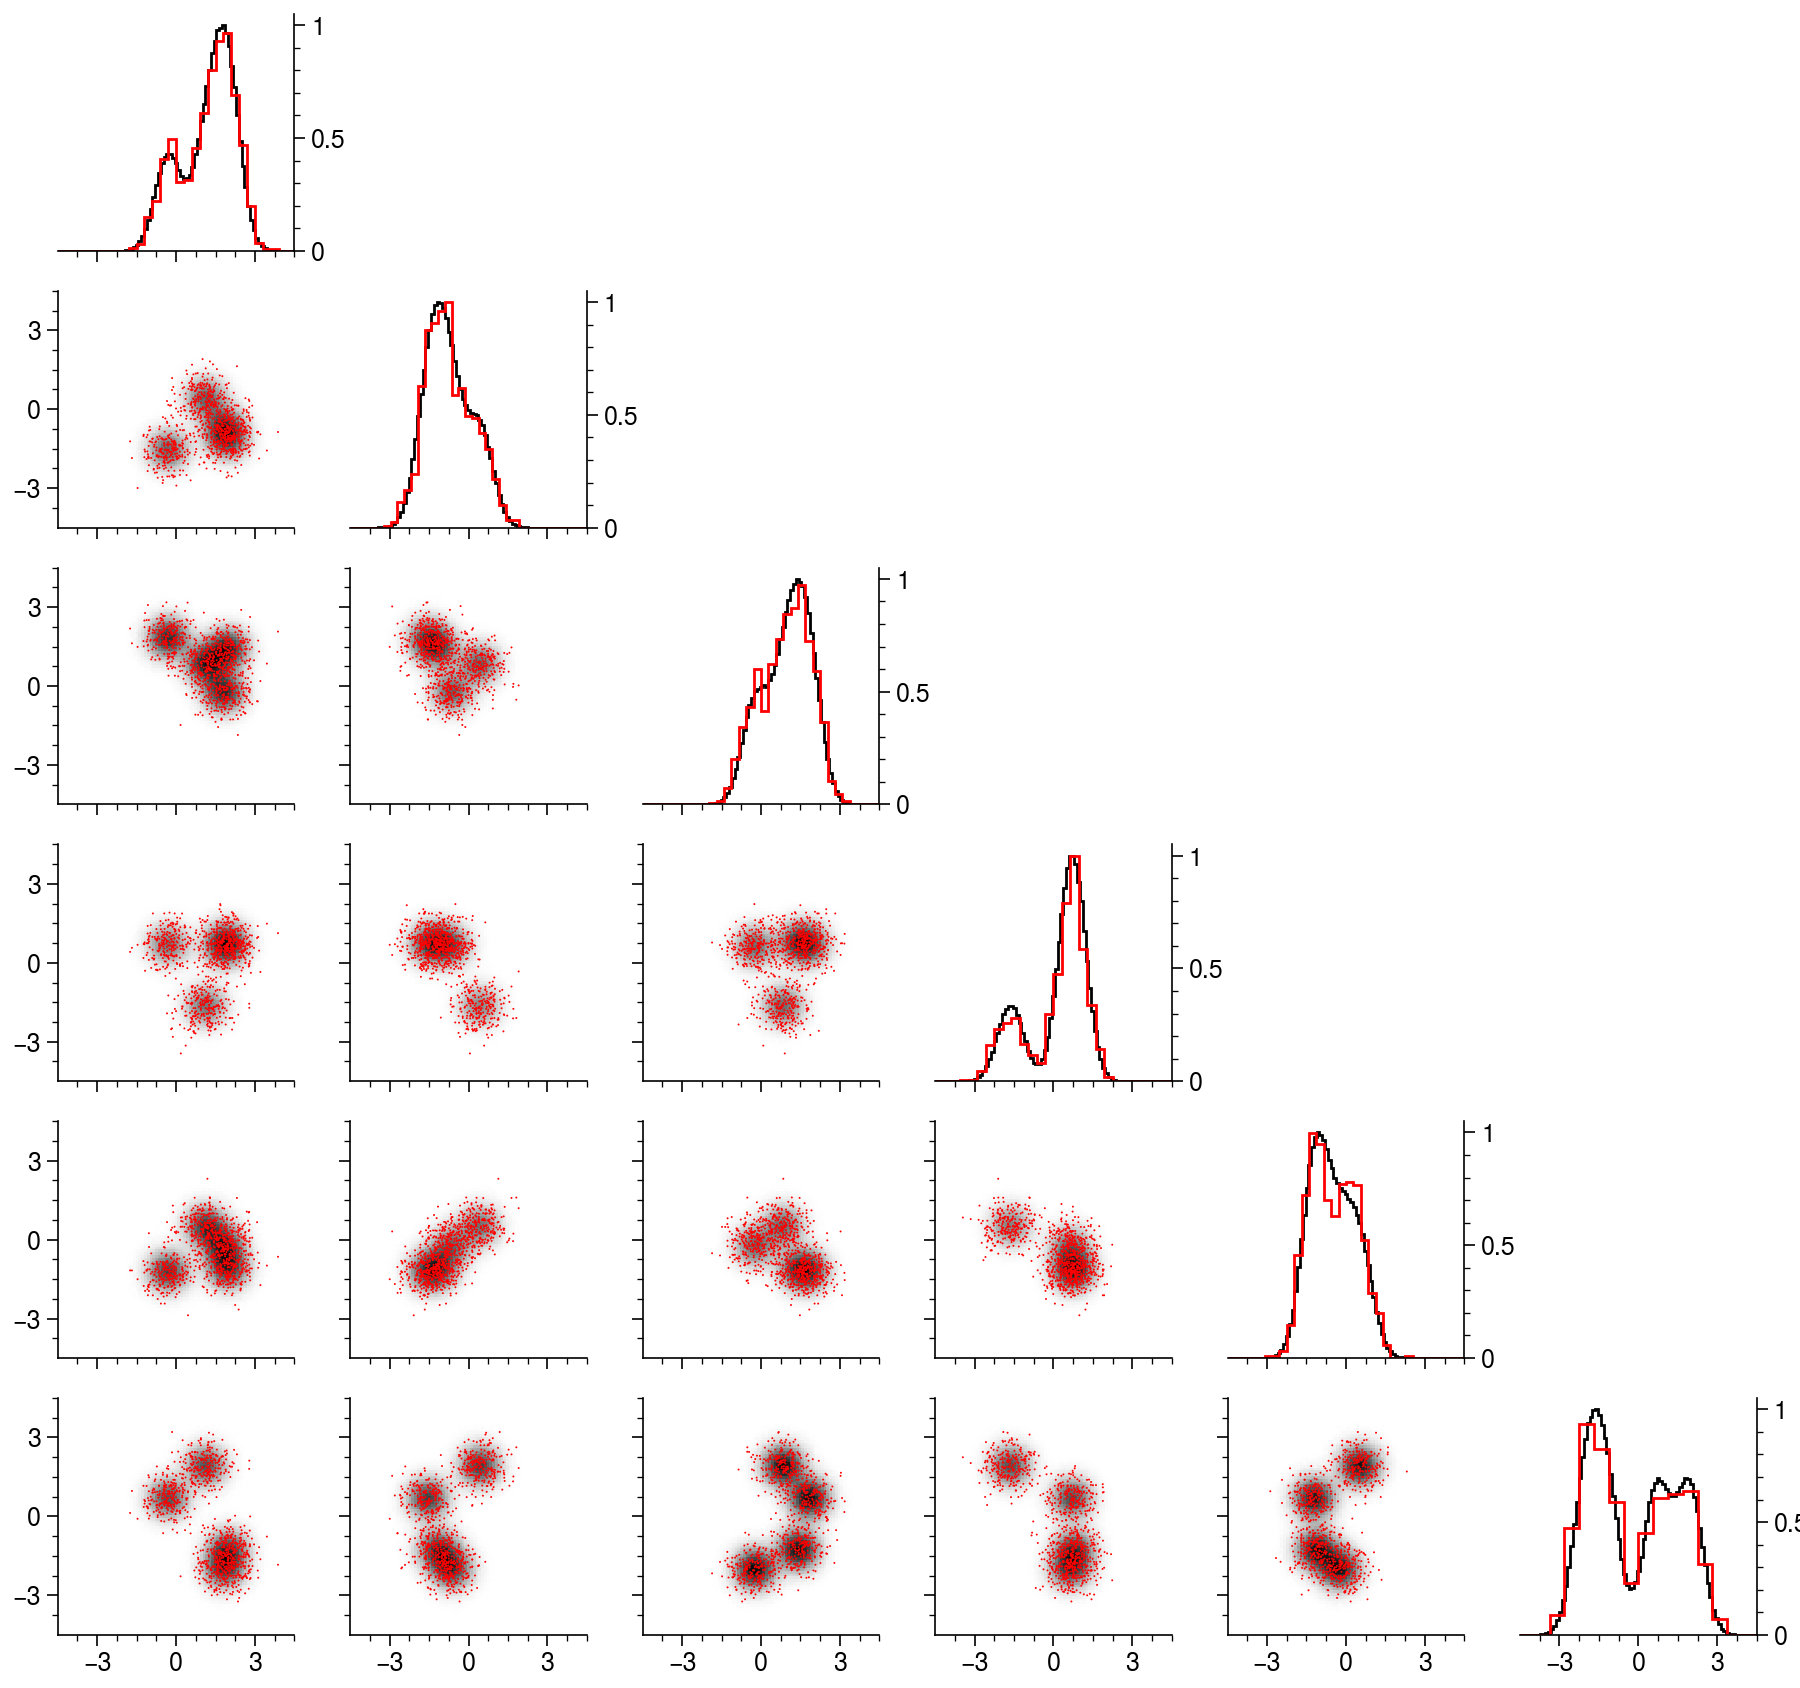

In [8]:
grid = psv.CornerGrid(d, diag_rspine=True)
grid.plot_points(x_true, bins=85, limits=grid_limits, cmap="mono")
grid.plot_points(x_samp[:1000], s=0.5, kind="scatter", color="red", diag_kws=dict(color="red"));
pplt.show()